In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=4,n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)

In [ ]:
X

In [ ]:
y

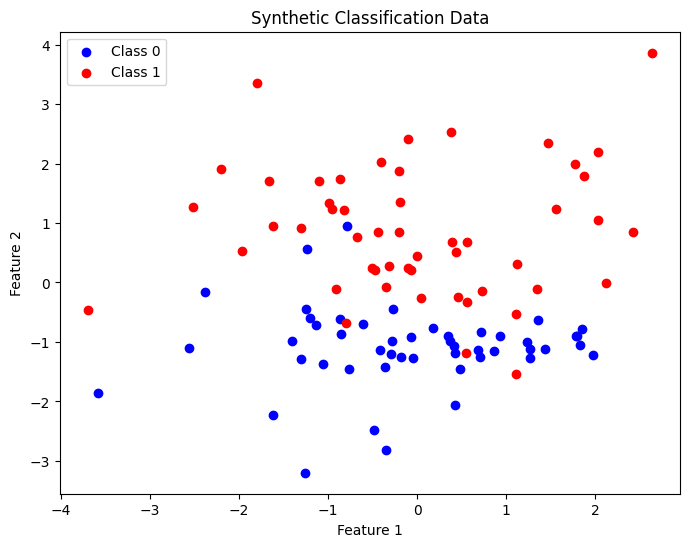

In [5]:
import matplotlib.pyplot as plt
# Visualize the generated data
plt.figure(figsize=(8, 6))

# Plot points for each class
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y== 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Add labels and a legend
plt.title('Synthetic Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()

In [6]:
clf = BaggingClassifier(SVC(),n_estimators=10, random_state=0).fit(X, y)


In [7]:
BaggingClassifier(clf,n_estimators=10, random_state=0).fit(X, y)

BaggingClassifier(estimator=BaggingClassifier(estimator=SVC(), random_state=0),
                  random_state=0)

In [8]:
#single value prediction
clf.predict([[0, 0, 0, 0]])

array([1])

In [9]:
clf2 = BaggingClassifier().fit(X, y)

In [10]:
#single value prediction
clf2.predict([[0, 0, 0, 0]])

array([1])

In [11]:
data=[[4.22,-2.0532,9.1017891,3.1721]]

In [12]:
clf.predict(data)

array([1])

In [13]:
clf2.predict(data)

array([0])

In [14]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\ProgramData\anaconda3\envs\datasciencein\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: pandas-dq


In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
     

In [16]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [17]:
X

array([[-8.98614416e-01, -2.89486451e+00, -2.22130274e+00,
        -1.36961838e-01, -5.48150105e-01],
       [-3.65803858e-01, -7.78476823e-01,  1.45670438e+00,
        -7.98076935e-01,  8.64566717e-01],
       [ 1.63417583e+00, -1.55324358e+00,  9.28348018e-02,
         1.85864974e-01,  5.58801754e-01],
       [-1.92669046e+00, -3.29206745e+00, -8.70376494e-01,
        -4.66162342e-01, -1.62494798e+00],
       [ 4.82253888e+00,  4.41525721e-01, -2.52052196e+00,
         3.58336260e+00,  5.41237238e-01],
       [-2.30996857e+00,  3.40309934e-01,  2.68626216e-02,
        -8.14446594e-01,  1.14501802e+00],
       [-1.61837809e+00, -4.29797363e-01,  1.77315378e+00,
        -9.78290759e-01,  8.57628315e-01],
       [ 1.44391358e+00,  1.50196692e+00,  2.05204991e+00,
         2.73755552e-01, -3.09134050e-01],
       [-1.15666010e+00,  2.48730256e+00,  3.96019234e+00,
        -7.29630870e-01,  8.61158448e-01],
       [-6.93965779e-01, -1.00433515e+00,  6.64459618e-01,
        -4.89178214e-01

In [18]:
y

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [19]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()
     

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.898614,-2.894865,-2.221303,-0.136962,-0.548150,0
1,-0.365804,-0.778477,1.456704,-0.798077,0.864567,0
2,1.634176,-1.553244,0.092835,0.185865,0.558802,0
3,-1.926690,-3.292067,-0.870376,-0.466162,-1.624948,0
4,4.822539,0.441526,-2.520522,3.583363,0.541237,1


In [20]:
bag =BaggingClassifier()
     

In [21]:
df.iloc[:,-1]

0     0
1     0
2     0
3     0
4     1
     ..
95    1
96    0
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [22]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier()

In [23]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


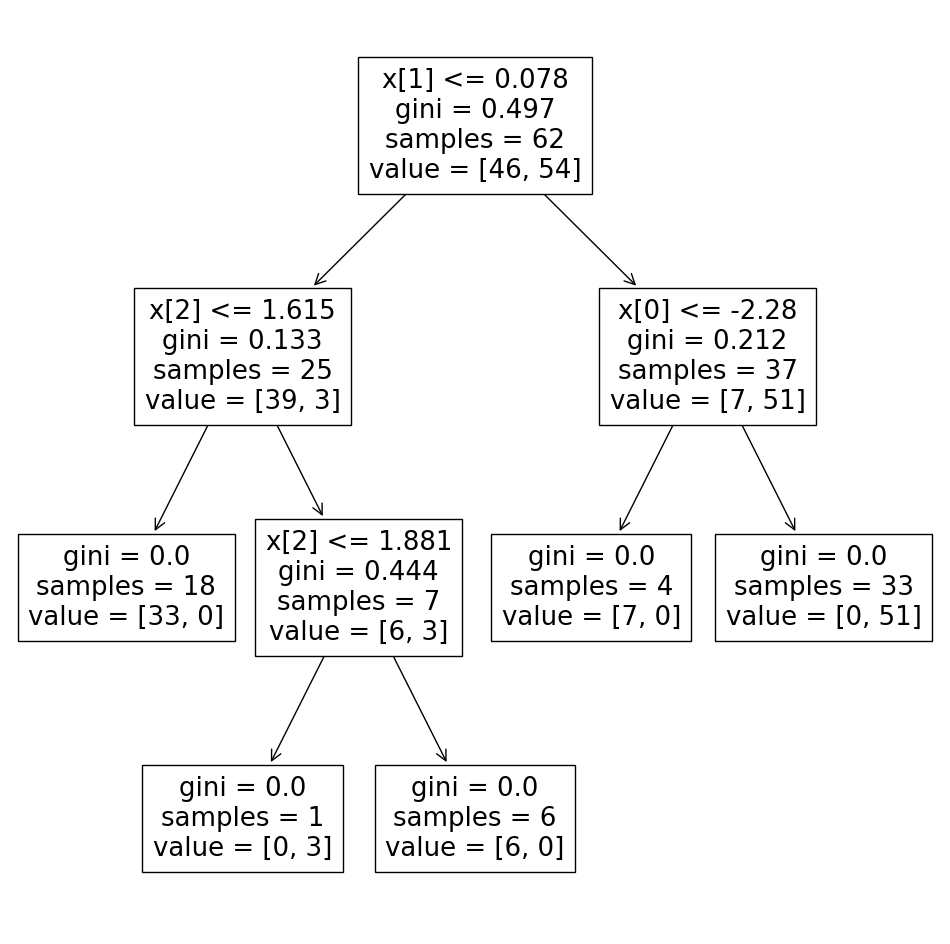

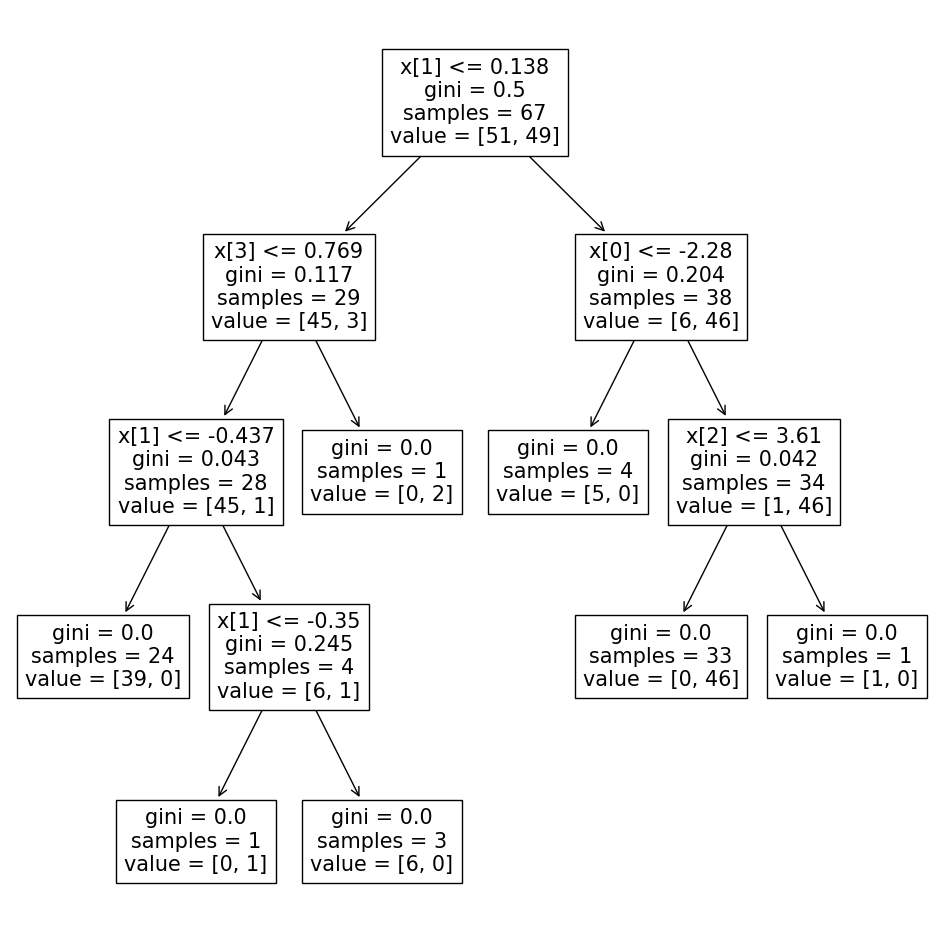

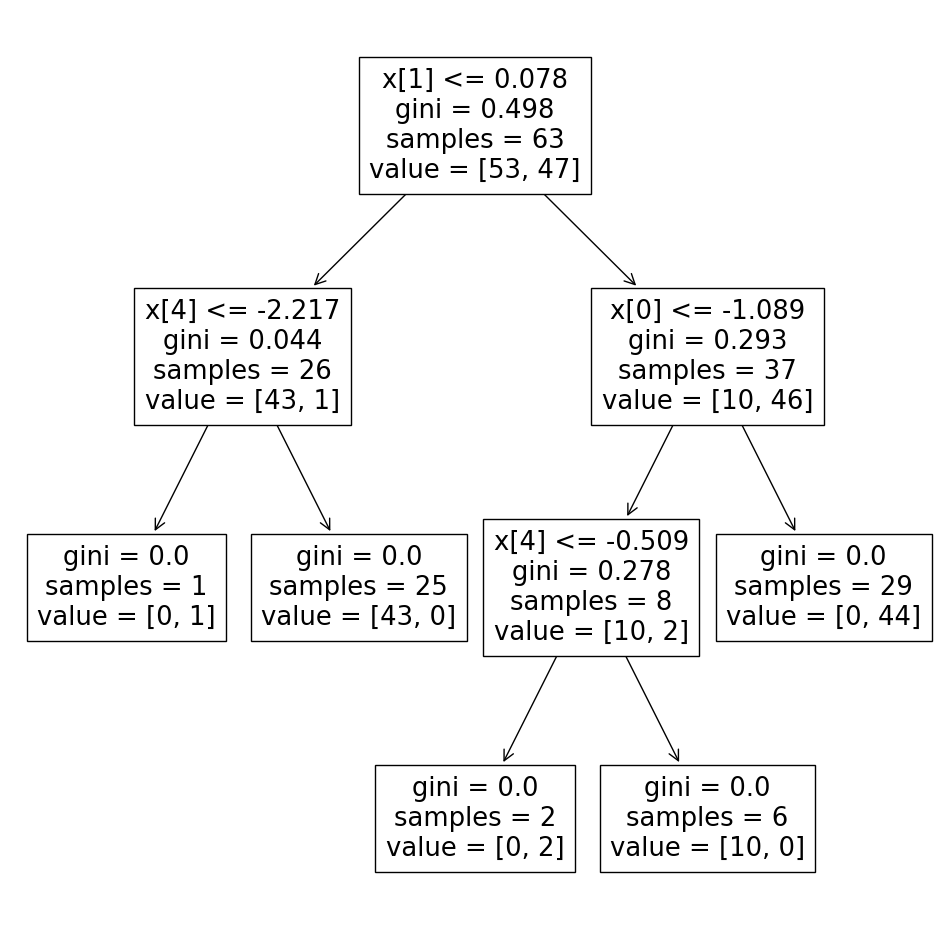

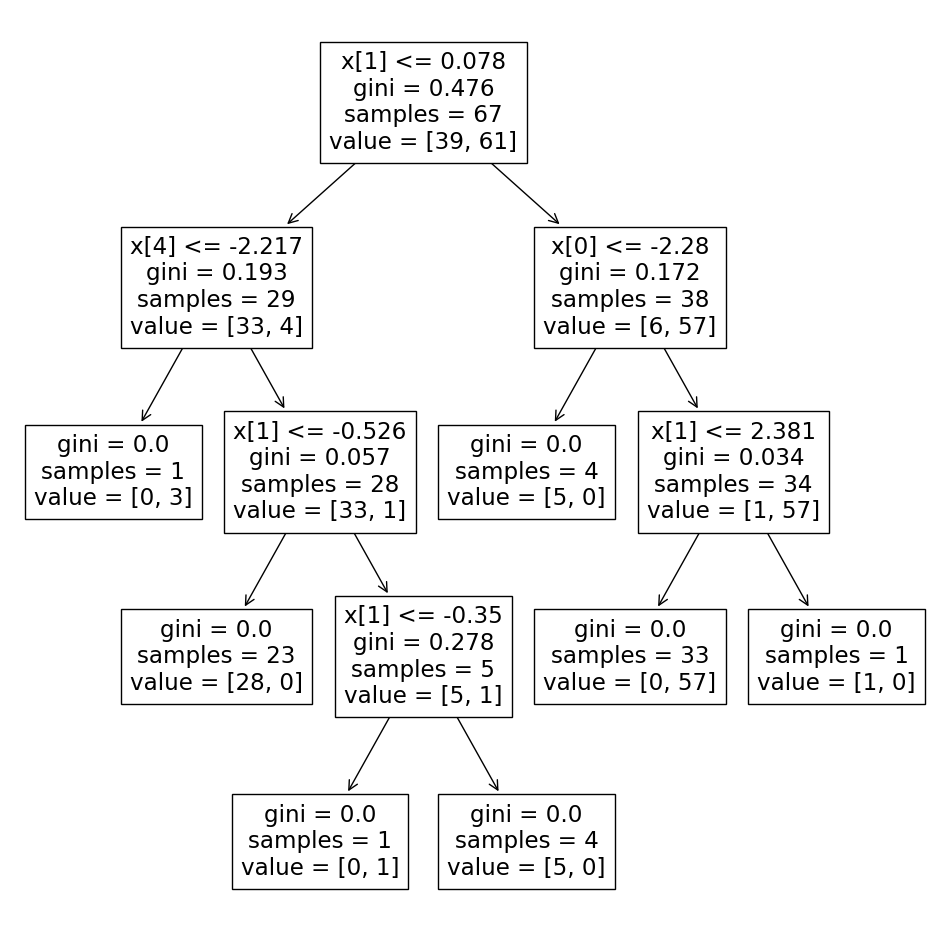

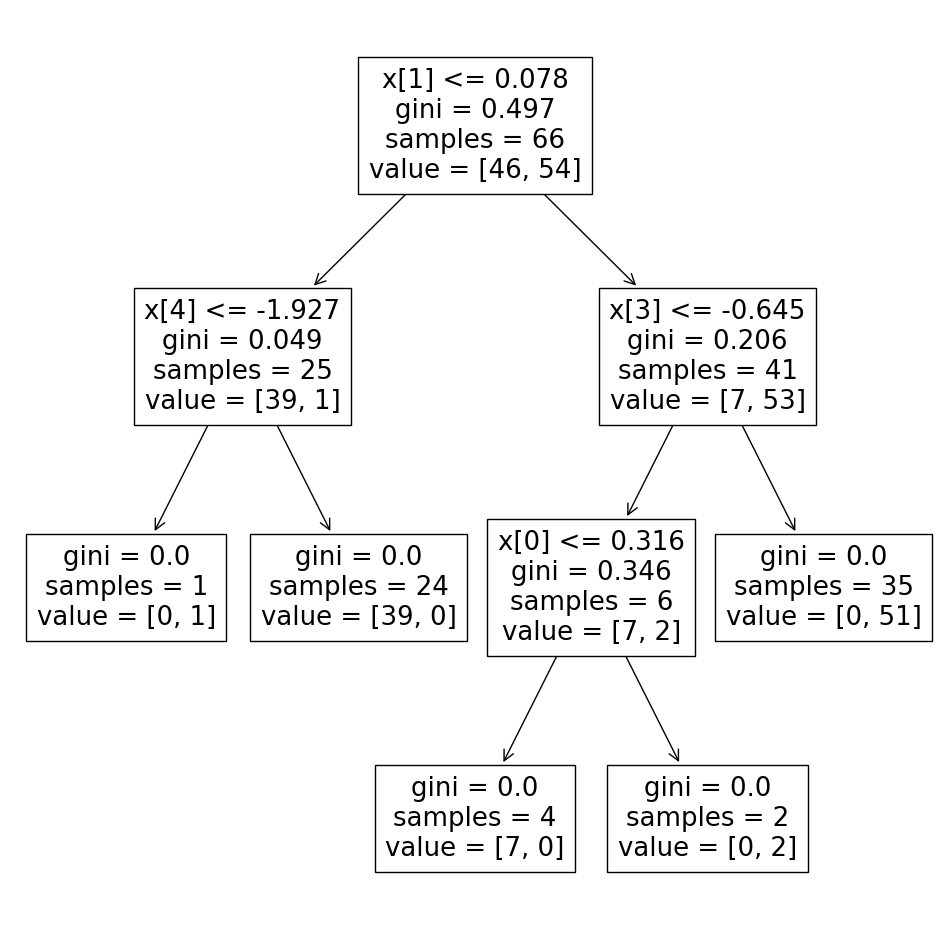

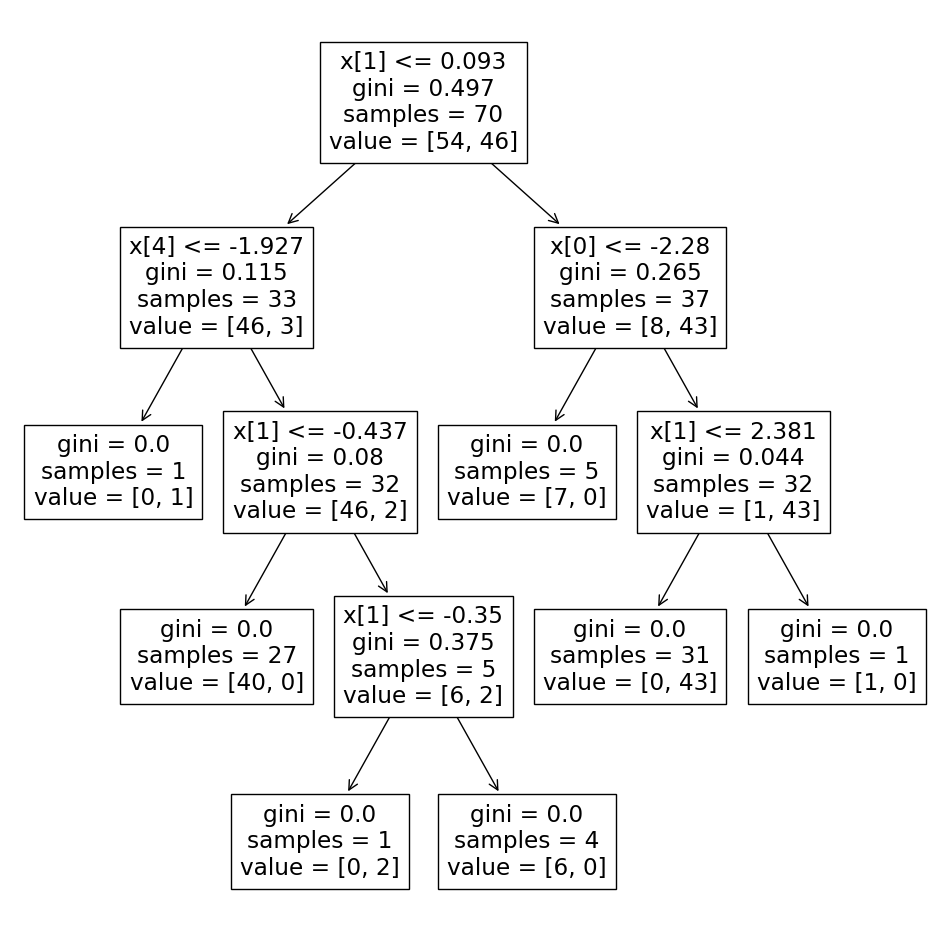

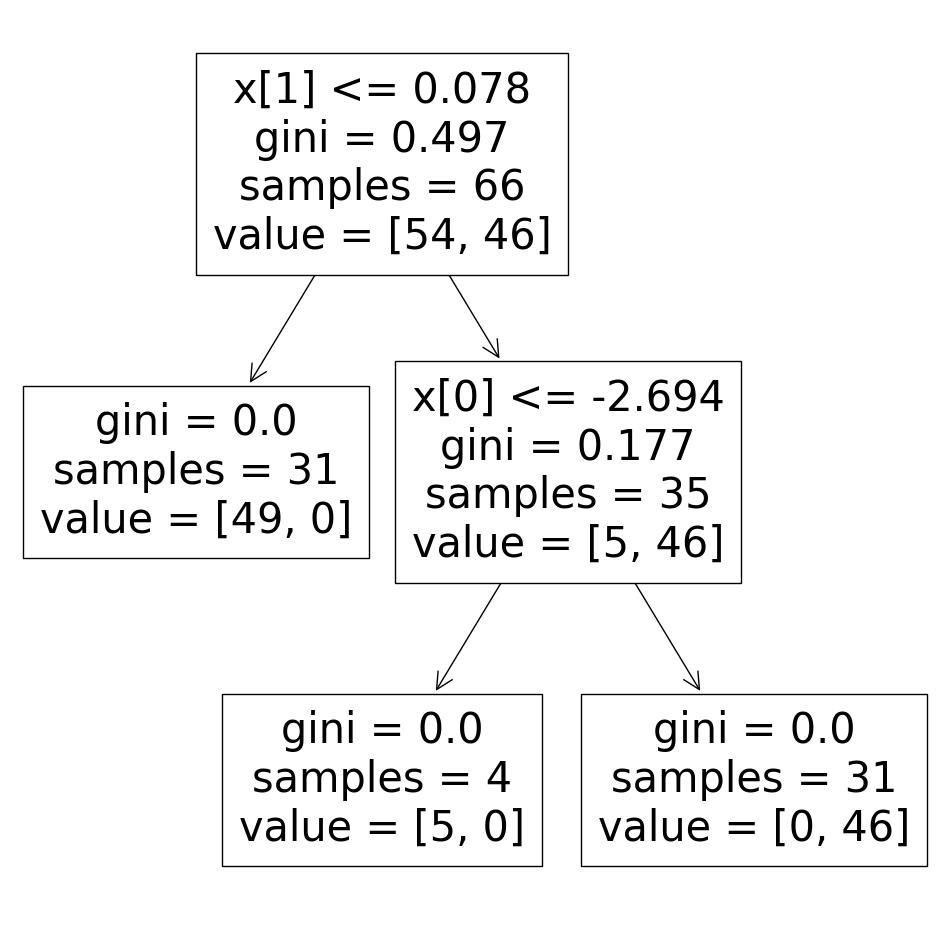

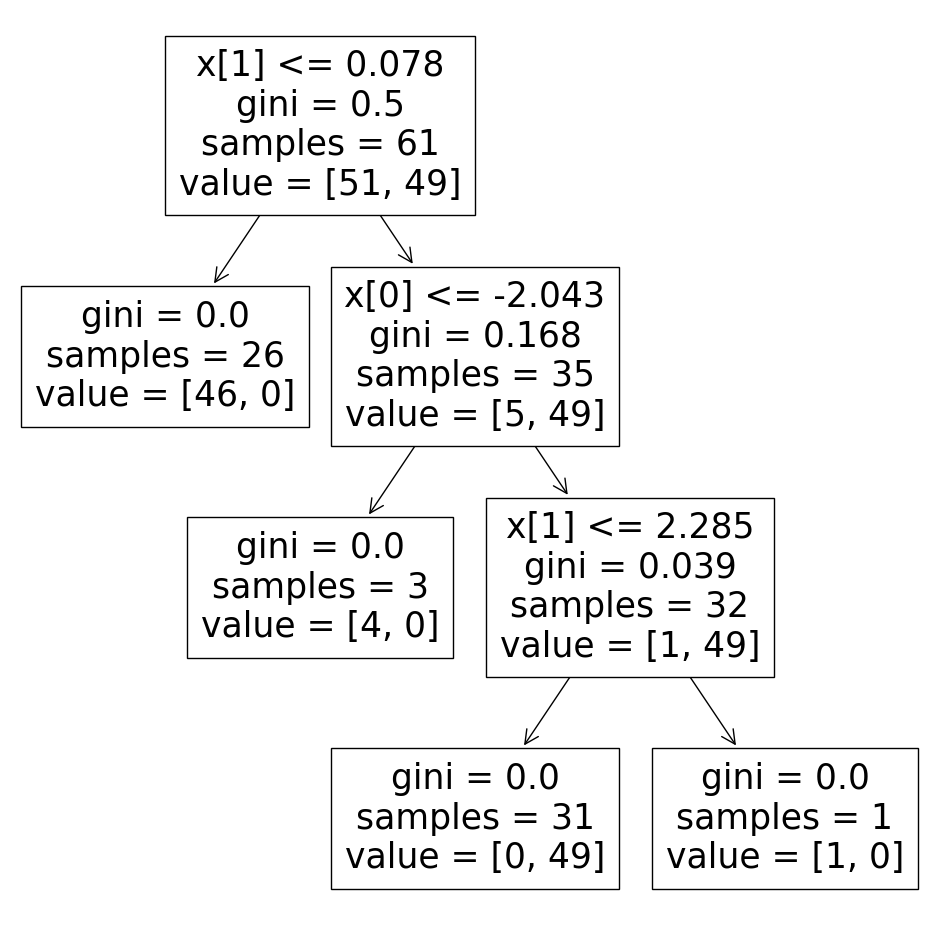

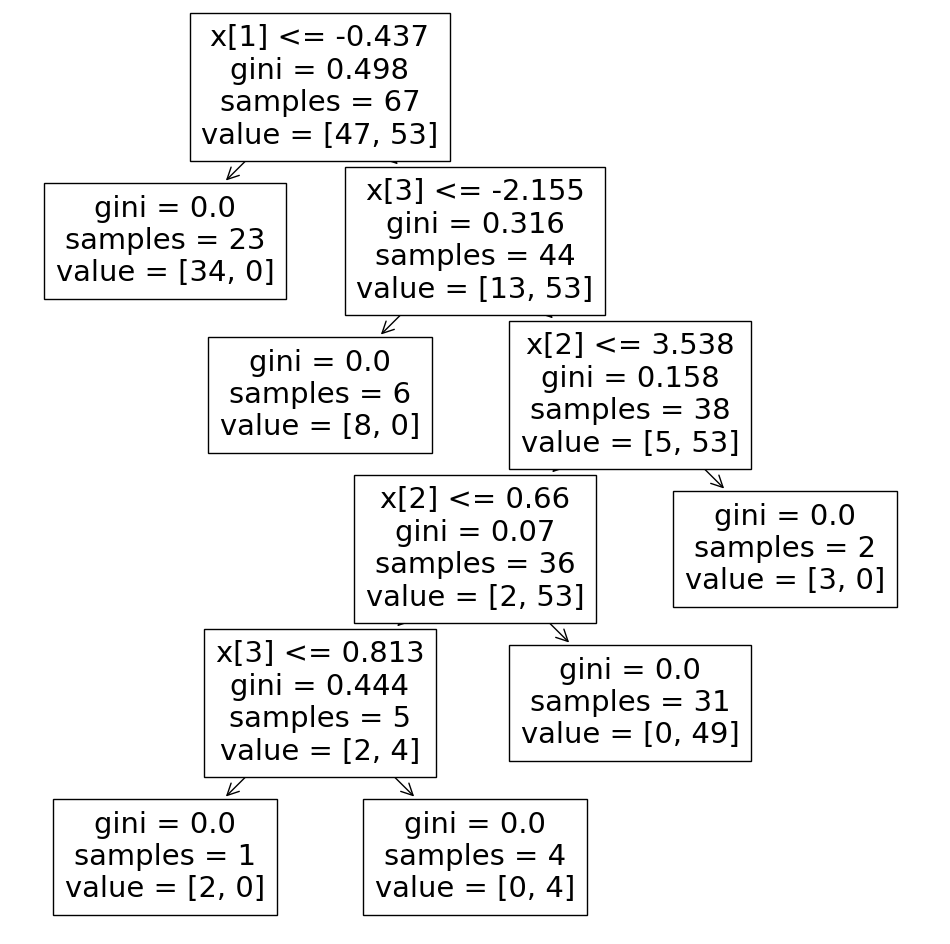

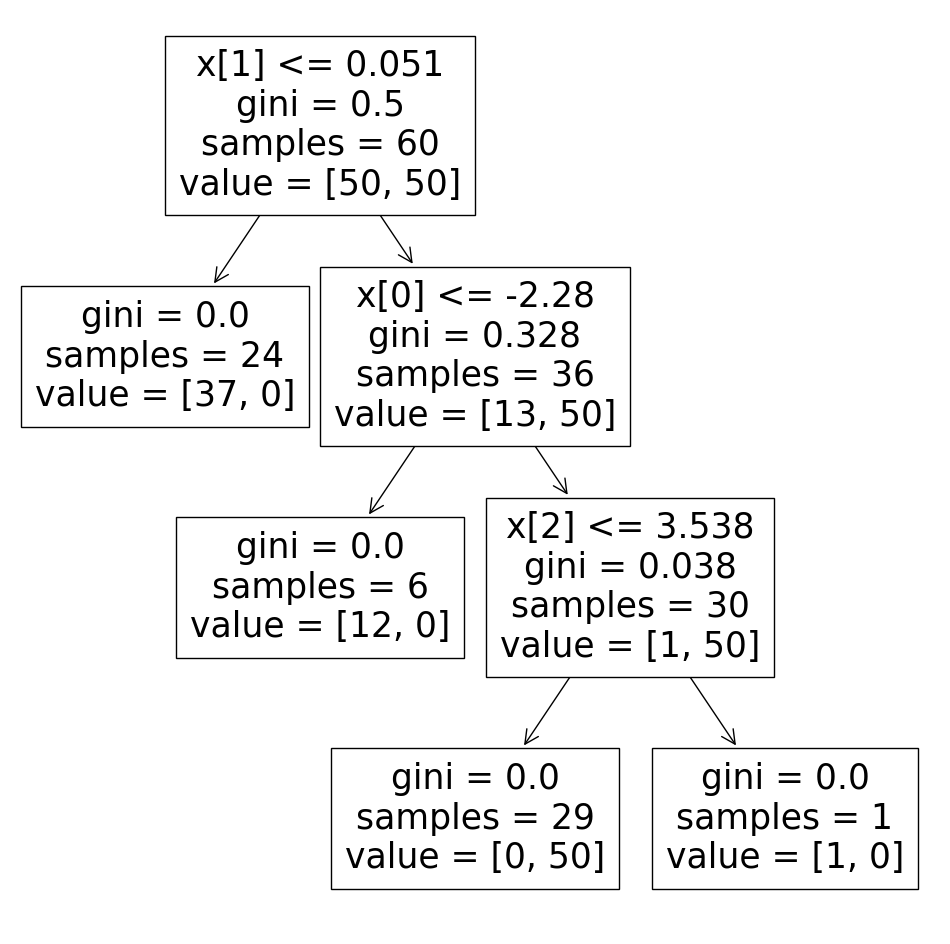

In [25]:
for i in range(0,10):
    plt.figure(figsize=(12,12))
    plot_tree(bag.estimators_[i])
    plt.show()

In [26]:
rf=RandomForestClassifier()

In [27]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier()

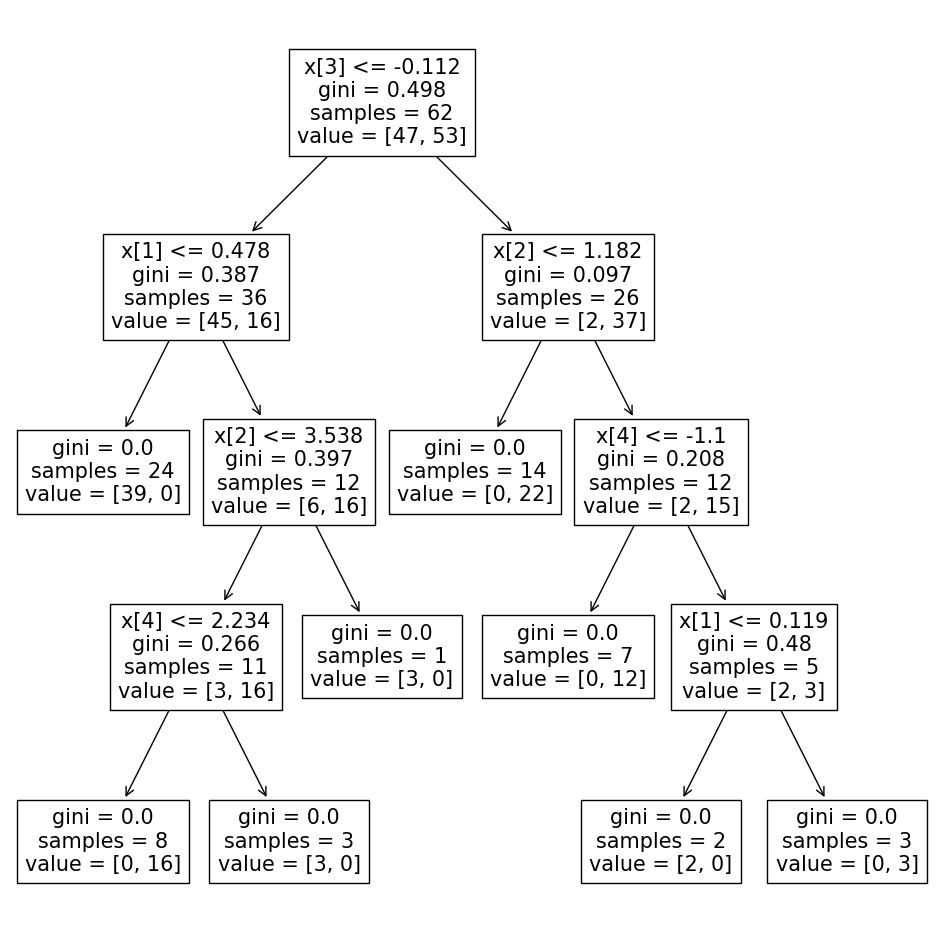

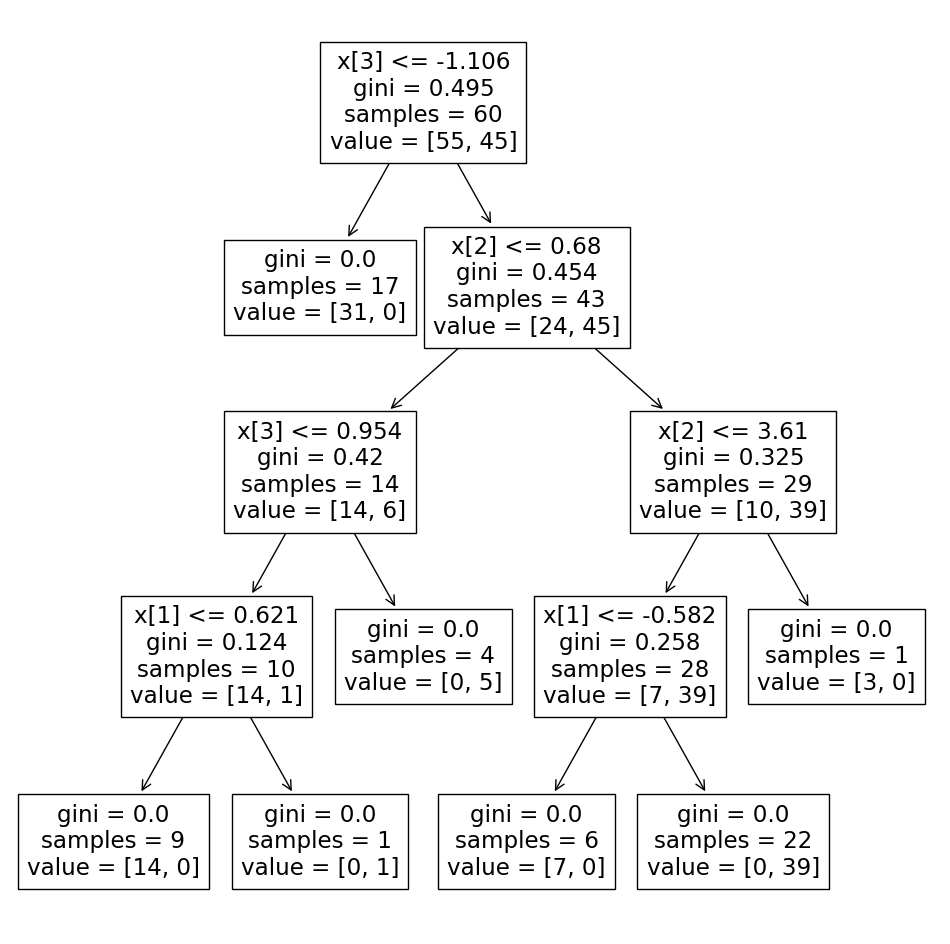

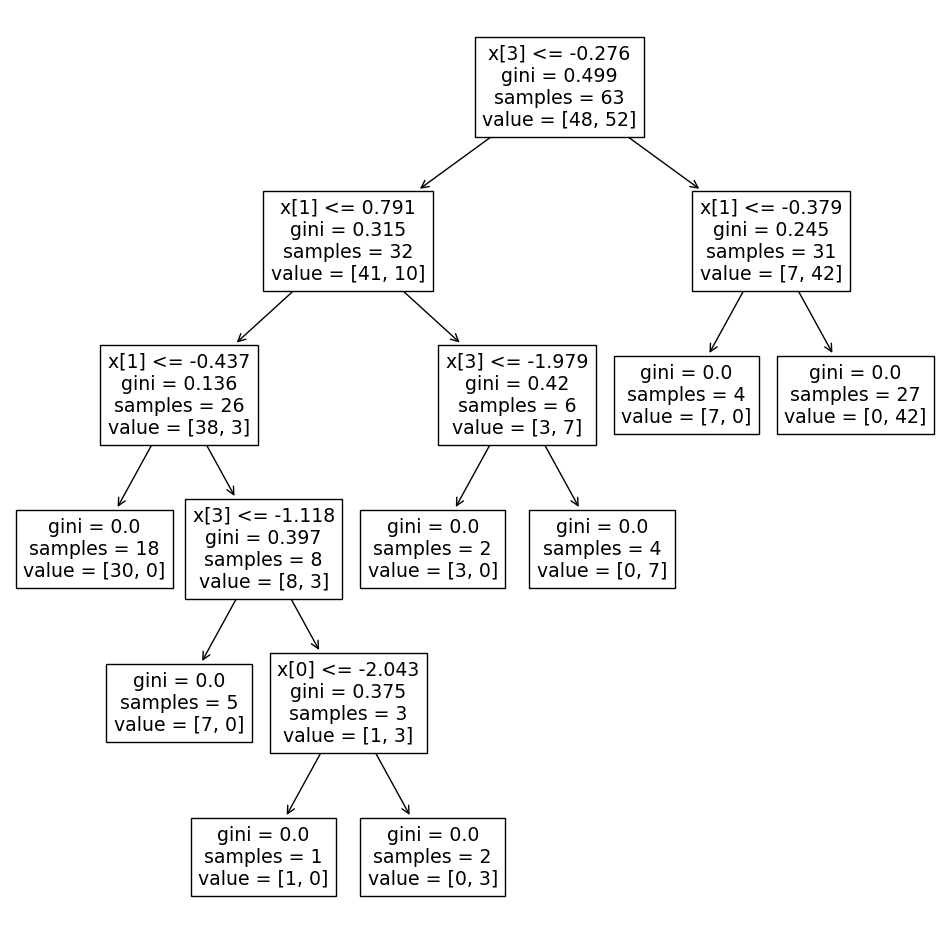

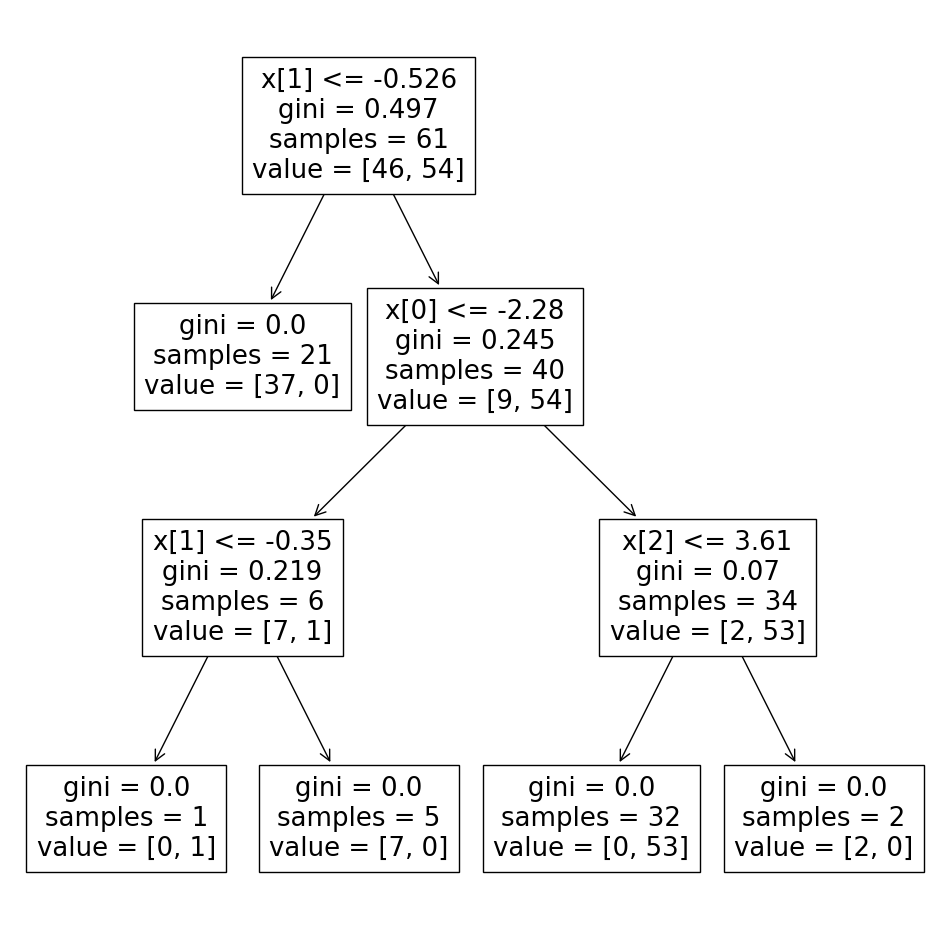

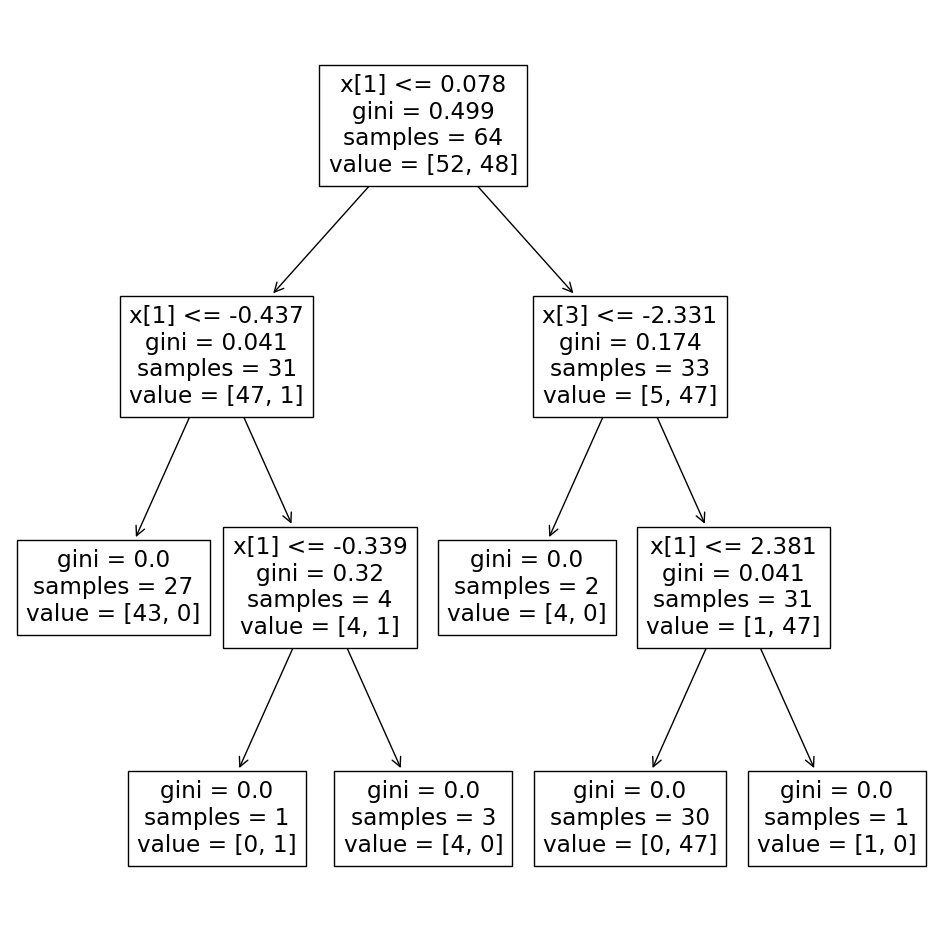

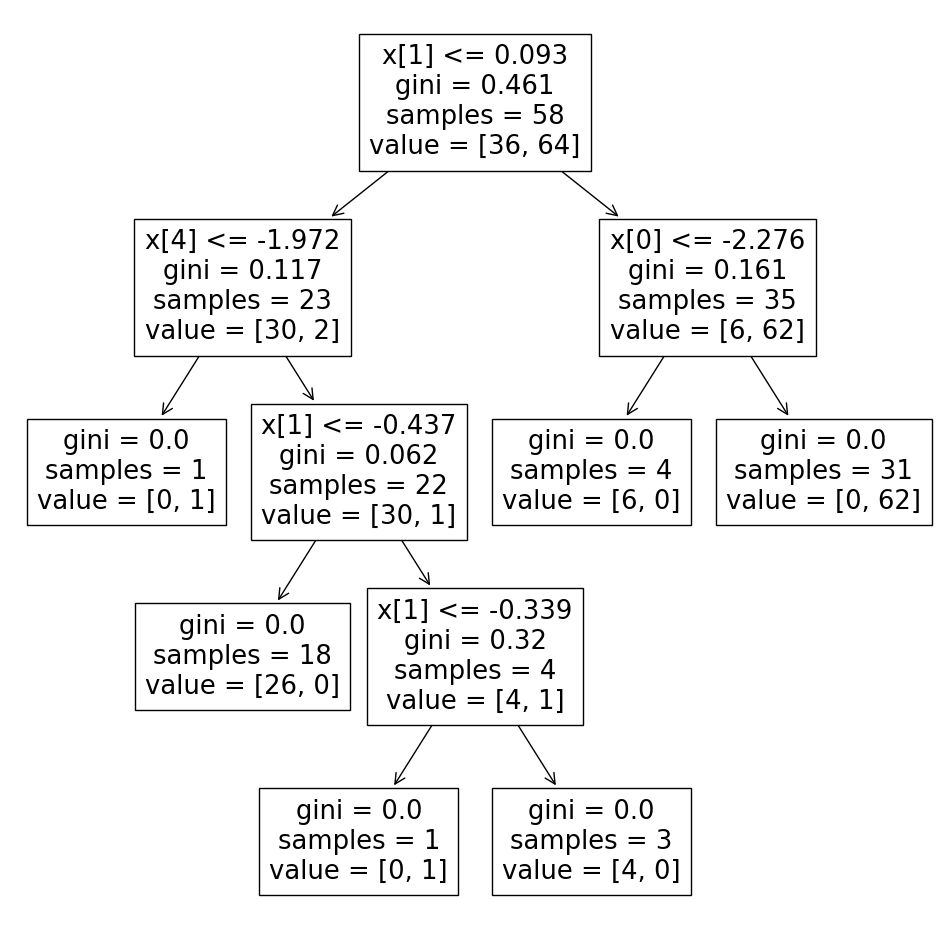

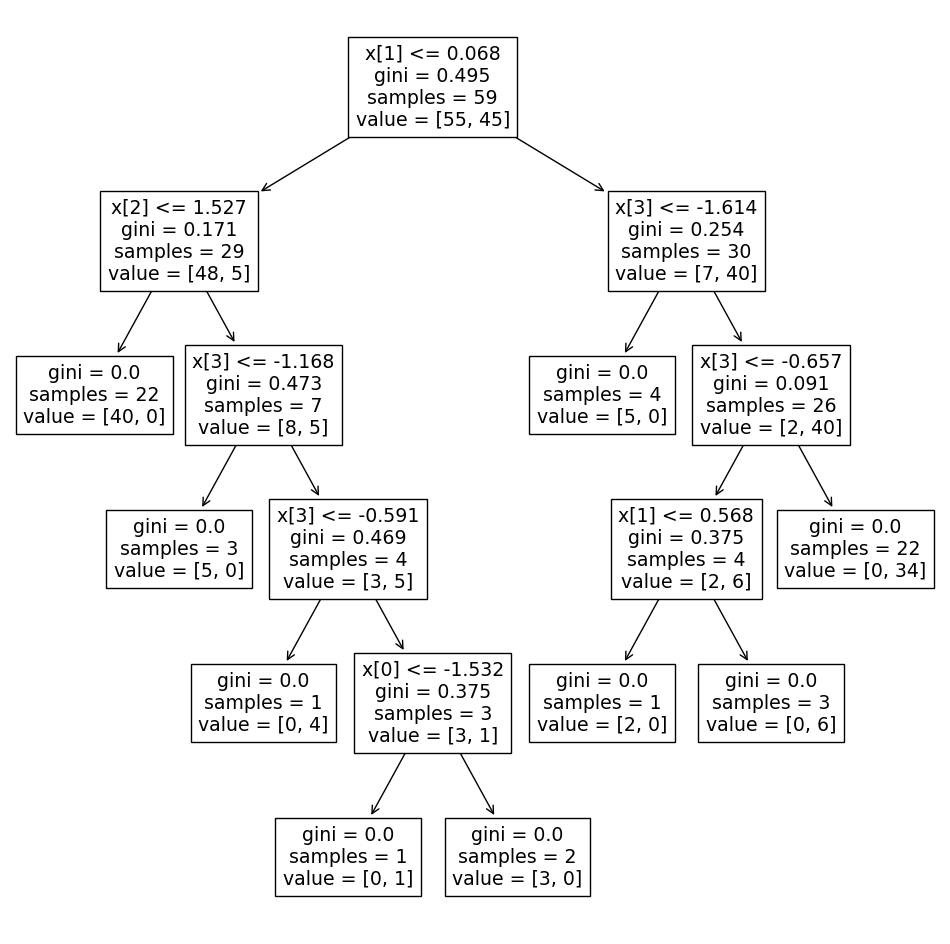

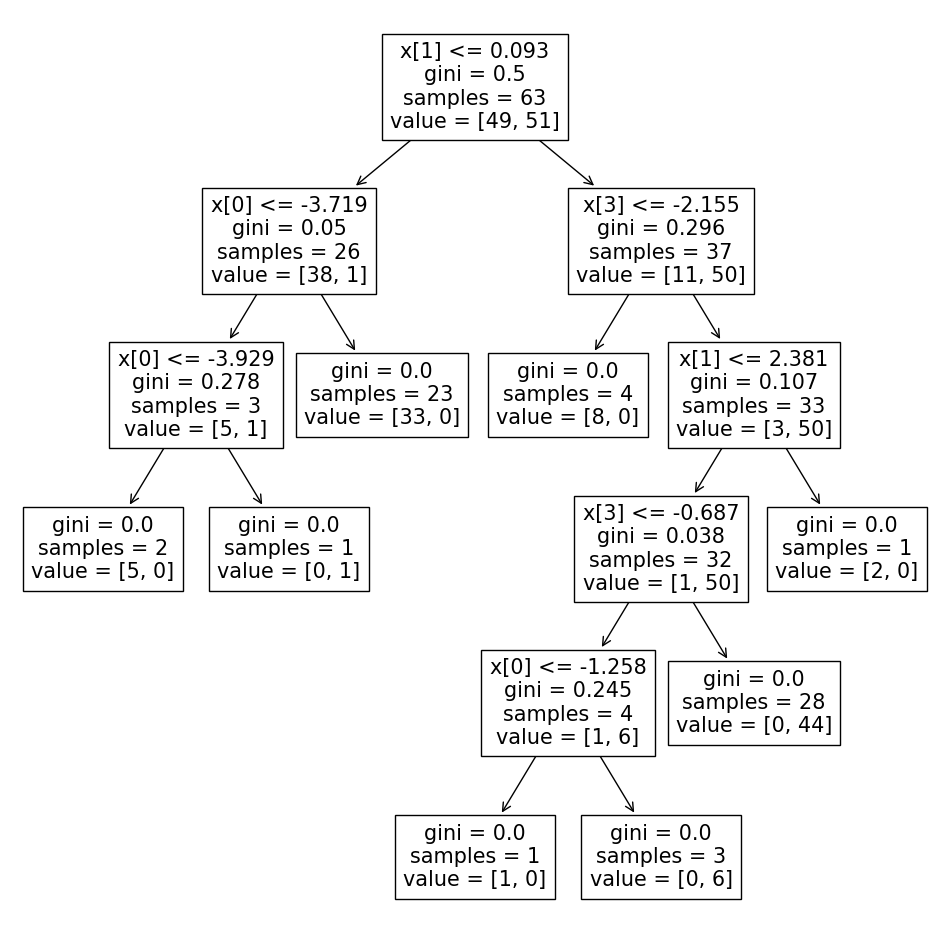

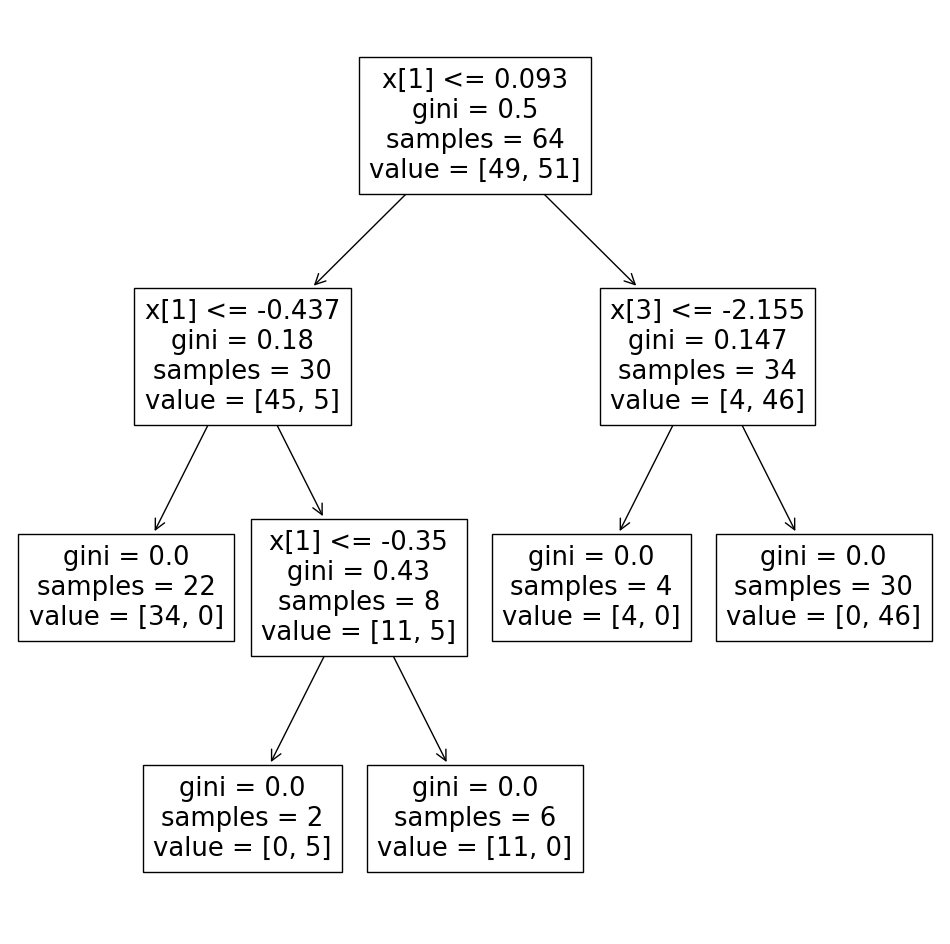

In [28]:

for i in range(0,9):
    plt.figure(figsize=(12,12))
    plot_tree(rf.estimators_[i])
    plt.show()

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [30]:
df = pd.read_csv('heart.csv')

 age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol level (chol), fasting blood sugar (fbs), rest ECG results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), slope of the peak exercise ST segment (slope), number of major vessels colored by fluoroscopy (ca), thalassemia type (thal), and the target variable indicating the presence or absence of heart disease.

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [35]:
print(X_train.shape)
print(X_test.shape)

(820, 13)
(205, 13)


In [36]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()# just keep it here will understand the intition in next class
svc = SVC()
lr = LogisticRegression()

# random forest

In [37]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9853658536585366

# gredient boosting

In [38]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9317073170731708

# SVM

In [39]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.6829268292682927

# logistic regressoin

In [40]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

C:\ProgramData\anaconda3\envs\datasciencein\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7853658536585366

In [41]:
rf2 = RandomForestClassifier(max_samples=0.75,random_state=42)
rf2.fit(X_train,y_train)
y_pred = rf2.predict(X_test)
accuracy_score(y_test,y_pred)

0.9853658536585366

# Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))
print(np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy')))

[1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
0.9970588235294118


# hyperparameter tuning

# grid search CV

In [43]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [44]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [45]:
rf3 = RandomForestClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf3, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [47]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 120}

In [48]:
rf4=RandomForestClassifier(max_depth=2,max_features=0.2,max_samples=0.5,n_estimators=60)

In [49]:
rf4.fit(X_train,y_train)
y_pred = rf4.predict(X_test)
accuracy_score(y_test,y_pred)

0.8146341463414634

In [50]:
rf_grid.best_score_

0.9853658536585366

# random search CV

In [51]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [52]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [53]:
rf5 = RandomForestClassifier()

In [54]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf5, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [55]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\anaconda3\envs\datasciencein\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\datasciencein\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\envs\datasciencein\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\datasciencein\Lib\site-p

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [56]:
rf_grid.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [57]:
rf6 = RandomForestClassifier(n_estimators=60,min_samples_split=5,min_samples_leaf=2,max_samples=0.5,max_features=0.2,max_depth=8,bootstrap=True)

In [58]:
rf6.fit(X_train,y_train)
y_pred = rf6.predict(X_test)
accuracy_score(y_test,y_pred)

0.9073170731707317

In [59]:
# feature selection based on Fi, oob_score, stacking


# boosting

clustering
navie bayes
KNN
PCA

SyntaxError: invalid syntax (932414239.py, line 7)